<a href="https://colab.research.google.com/github/RJ-git8585/py/blob/main/Titanic_Survived_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
titanic = pd.read_csv('/content/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
titanic.shape

(891, 12)

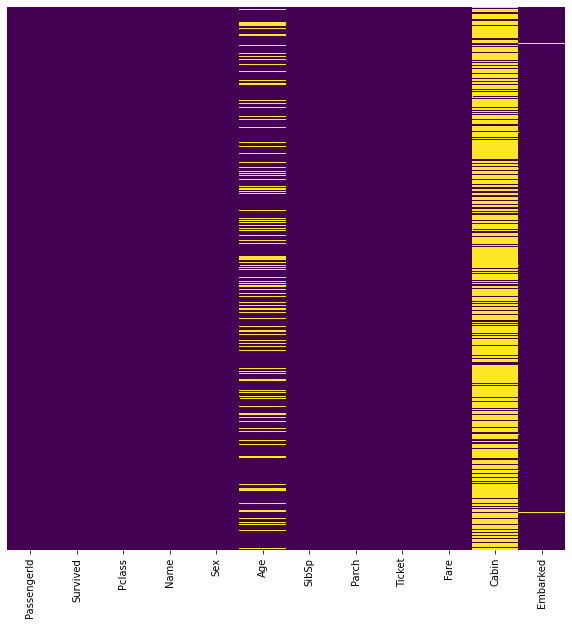

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

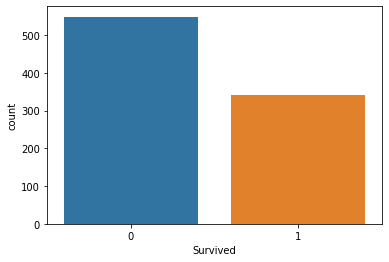

In [96]:
sns.countplot(x='Survived', data=titanic, palette=None)

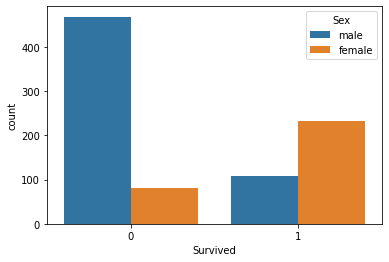

In [97]:
sns.countplot(x='Survived', hue='Sex' , data=titanic, palette=None)

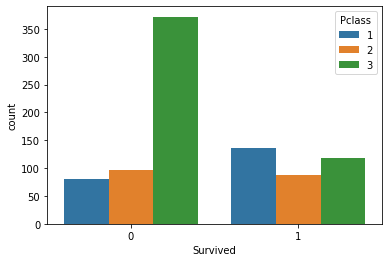

In [98]:
sns.countplot(x='Survived', hue='Pclass' , data=titanic, palette=None)

In [99]:
titanic.groupby('Pclass')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [100]:
def age_calculator(cols):
    age_map = [38, 30, 25]
    
    age, pclass = cols[0], cols[1]
    
    if pd.isnull(age):
        return age_map[int(pclass) - 1]
    else:
        return age

In [101]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age_calculator, axis = 1)


In [102]:
titanic.drop('Cabin', axis=1 , inplace=True)


In [103]:
titanic.dropna(inplace=True)

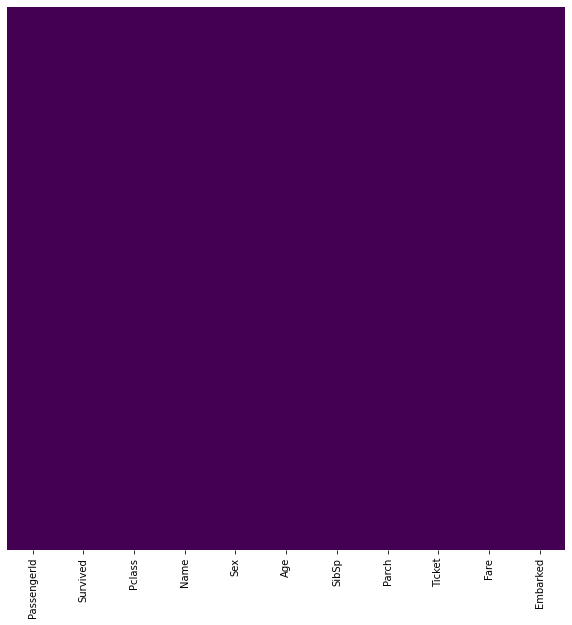

In [104]:
plt.figure(figsize=(10,10))

sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [105]:
titanic.shape

(889, 11)

In [106]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [107]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [108]:
gender = pd.get_dummies(titanic['Sex'], drop_first=True)

gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [109]:
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)

embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [110]:
sibsp = pd.get_dummies(titanic['SibSp'], prefix='SibSp')

sibsp.head()

,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [111]:
parch = pd.get_dummies(titanic['Parch'], prefix='Parch')

parch.head()

,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [112]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [113]:
titanic = titanic.drop(['PassengerId', 'Name', 'Sex', 
                        'SibSp', 'Parch', 'Ticket', 'Embarked'], axis=1)

titanic.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [114]:
titanic = pd.concat([titanic, gender, embark, sibsp, parch], axis = 1)

titanic.head()

,Survived,Pclass,Age,Fare,male,Q,S,SibSp_0,SibSp_1,SibSp_2,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,3,22.0,7.2500,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,38.0,71.2833,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,35.0,53.1000,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,35.0,8.0500,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


x = titanic.drop('Survived', axis = 1)

y = titanic['Survived']

In [116]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8,
                                               random_state=45)

In [117]:
model = LogisticRegression()

model.fit(xtrain,ytrain)
predictions = model.predict(xtest)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,predictions))

0.8033707865168539


In [119]:
model.predict_proba(xtest)

array([[0.77083046, 0.22916954],
       [0.0589165 , 0.9410835 ],
       [0.74298736, 0.25701264],
       [0.87012548, 0.12987452],
       [0.19077449, 0.80922551],
       [0.16646679, 0.83353321],
       [0.88841833, 0.11158167],
       [0.88271022, 0.11728978],
       [0.73881039, 0.26118961],
       [0.59477869, 0.40522131],
       [0.58752895, 0.41247105],
       [0.84930964, 0.15069036],
       [0.36374683, 0.63625317],
       [0.96259584, 0.03740416],
       [0.87431641, 0.12568359],
       [0.69538916, 0.30461084],
       [0.73881039, 0.26118961],
       [0.05150464, 0.94849536],
       [0.86591881, 0.13408119],
       [0.22298781, 0.77701219],
       [0.62215948, 0.37784052],
       [0.87660362, 0.12339638],
       [0.90880586, 0.09119414],
       [0.95420593, 0.04579407],
       [0.40725747, 0.59274253],
       [0.30892755, 0.69107245],
       [0.08759467, 0.91240533],
       [0.82454155, 0.17545845],
       [0.1164301 , 0.8835699 ],
       [0.9568651 , 0.0431349 ],
       [0.

In [120]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       117
           1       0.74      0.66      0.70        61

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.80      0.80      0.80       178



In [121]:
"""from sklearn.preprocessing import StandardScaler
sk=StandardScaler()
xtrain=sk.fit_transform(xtrain)
xtest=sk.transform(xtest)
"""


'from sklearn.preprocessing import StandardScaler\nsk=StandardScaler()\nxtrain=sk.fit_transform(xtrain)\nxtest=sk.transform(xtest)\n'

## **Applying Decision Tree!**

In [124]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(max_depth=150, random_state=0)
rf.fit(xtrain,ytrain)
y_pred=rf.predict(xtest)
"""classifier= DecisionTreeClassifier(criterion='gini', random_state=10)  
classifier.fit(xtrain, ytrain)
y_pred=classifier.predict(xtest)"""

"classifier= DecisionTreeClassifier(criterion='gini', random_state=10)  \nclassifier.fit(xtrain, ytrain)\ny_pred=classifier.predict(xtest)"

In [125]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred)*100)


78.08988764044943
